# Analysis

The goal of this analysis is to understand the distribution of urban and mixed use zoning in San Jose. They are as follows:


1. **Urban Village Commercial (UVC)** — Focused on commercial development in urban villages with pedestrian-oriented form. 
2. **Urban Village (UV)** — Mixed residential + commercial, with a variety of uses and a strong urban form emphasis. 
3. **Mixed Use Commercial (MUC)** — Supports a mix of commercial and residential uses; also can include light industrial if compatible. 
4. **Mixed Use Neighborhood (MUN)** — Targets more residential forms (townhouses, small lots, stacked flats), live/work, small-scale commercial. 
5. **Urban Residential (UR)** — Medium-density residential or mixed use; also allows stand-alone commercial (offices, retail, etc.). 
6. **Transit Residential (TR)** — High-density residential or mixed use near transit; also supports intensive commercial/employment uses like hotels or offices


Shapefiles for this analyis can be found [here](https://data.sanjoseca.gov/organization/maps-data).


In [132]:

#
# Import libraries
# --------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point

# settings
%matplotlib inline
pd.set_option("display.max_columns", None) # set off to see all columns



In [133]:
#
# Load data
# --------------------------------------
parcels = gpd.read_parquet("../output/parcels_with_zoning.parquet")
zoning = gpd.read_parquet("../output/zoning.parquet")
sj_acs = gpd.read_parquet("../output/san_jose_tracts_with_acs.geoparquet")
equity = gpd.read_parquet("../output/equity.parquet")


In [134]:
# view
parcels.head()  
#sj_acs.head()  


,OBJECTID_left,PARCELID,INTID_left,APN,LOTNUM,PARCELTYPE,FEATURECLA,PLANCRT,PLANMOD,LASTUPDATE_left,NOTES_left,COVERED,SHAPE_Leng_left,SHAPE_Area_left,CREATIONDA,geometry,OBJECTID_right,FACILITYID,INTID_right,ZONING,ZONINGABBR,REZONINGFI,PDUSE,PDDENSITY,DEVELOPEDA,APPROVALDA,COLORCODE,LASTUPDATE_right,NOTES_right,SHAPE_Leng_right,SHAPE_Area_right,overlap_area,zoning_class,zoning_planned
0,4378,1000,1000,09759046,46,Tax,Parcel,T-8284,None,2005-10-25,None,None,149.517344,1163.273287,1900-01-01,"POLYGON ((6148775 1972503.67, 6148789.84 19724...",1396.0,1396,1396.0,A(PD),A(PD),88034,Res,25.6,Yes,None,17,2022-04-22,None,5039.839521,1.155021e+06,1163.273287,Special Purpose,True
1,173262,1000000031,1000000031,30326084,6,Tax,Parcel,TR9494,None,2006-01-12,None,None,188.703136,2037.538177,1900-01-01,"POLYGON ((6135031.65 1943098.55, 6135092.737 1...",288.0,288,288.0,A(PD),A(PD),02028,Res,13,Yes,None,17,2022-04-22,None,737.405158,2.014218e+04,2037.538177,Special Purpose,True
2,69247,1000000032,1000000032,30326083,5,Tax,Parcel,TR9494,None,2006-01-12,None,None,187.780061,2020.818784,1900-01-01,"POLYGON ((6135031.425 1943065.085, 6135092.096...",288.0,288,288.0,A(PD),A(PD),02028,Res,13,Yes,None,17,2022-04-22,None,737.405158,2.014218e+04,2020.818784,Special Purpose,True
3,147109,1000000033,1000000033,30326082,4,Tax,Parcel,TR9494,None,2006-01-12,None,None,187.209294,1994.378436,1900-01-01,"POLYGON ((6135129.912 1943077.395, 6135136.921...",288.0,288,288.0,A(PD),A(PD),02028,Res,13,Yes,None,17,2022-04-22,None,737.405158,2.014218e+04,1994.378436,Special Purpose,True
4,147110,1000000034,1000000034,30326081,3,Tax,Parcel,TR9494,None,2006-01-12,None,None,212.838294,2261.152730,1900-01-01,"POLYGON ((6135219.701 1943048.88, 6135219.367 ...",288.0,288,288.0,A(PD),A(PD),02028,Res,13,Yes,None,17,2022-04-22,None,737.405158,2.014218e+04,2261.152730,Special Purpose,True


## 1. How many parcels are there in each zone?

I began by visualizing the parcel and zoning shapefiles to confirm that their geometries aligned and to get a sense of the spatial context. I then performed a spatial join to identify which zoning district each parcel intersected. Because some parcels overlap multiple zoning polygons, the join produced duplicates--I assigned each parcel to the zoning district with the largest overlapping area. Since this analysis is interested in urban rezoning, I generated parcel counts for the four zones of interest—Urban Village, Mixed Use Commercial, Urban Residential, and Transit Residential—followed by a visualization of the results. Knowing how many parcels fall within each zoning district helps planners assess development capacity, evaluate alignment with policy goals, and anticipate where future growth or zoning changes may have the greatest impact.

In [138]:
parcels[["ZONING", "zoning_class"]]

,ZONING,zoning_class
0,A(PD),Special Purpose
1,A(PD),Special Purpose
2,A(PD),Special Purpose
3,A(PD),Special Purpose
4,A(PD),Special Purpose
...,...,...
224903,A(PD),Special Purpose
224904,A(PD),Special Purpose
224905,A(PD),Special Purpose
224906,R-1-8,Residential


In [140]:
# subset out only the mixed use
mixed_use = parcels.query(" zoning_class == 'Mixed Use' ")
mixed_use.head()


,OBJECTID_left,PARCELID,INTID_left,APN,LOTNUM,PARCELTYPE,FEATURECLA,PLANCRT,PLANMOD,LASTUPDATE_left,NOTES_left,COVERED,SHAPE_Leng_left,SHAPE_Area_left,CREATIONDA,geometry,OBJECTID_right,FACILITYID,INTID_right,ZONING,ZONINGABBR,REZONINGFI,PDUSE,PDDENSITY,DEVELOPEDA,APPROVALDA,COLORCODE,LASTUPDATE_right,NOTES_right,SHAPE_Leng_right,SHAPE_Area_right,overlap_area,zoning_class,zoning_planned
308,160369,1000000644,1000000644,25958C01,1,GCE,Parcel,T-9665,MGE,2006-03-10,None,None,1277.728161,63832.563251,1900-01-01,"POLYGON ((6156170.59 1949881.6, 6155726.946 19...",6240.0,6240,6240.0,TR,TR,C21-041,None,None,No,None,2,2022-04-22,None,1277.726931,63832.461822,63806.463674,Mixed Use,False
309,160955,1000000649,1000000649,25951003,3,Tax,Parcel,3-14431,None,2006-02-25,None,None,1318.050229,14835.996702,1900-01-01,"POLYGON ((6156131.281 1949988.966, 6156116.768...",20039.0,20039,20039.0,TR,TR,C21-041,None,41,No,None,2,2022-12-06,None,2025.510124,192138.972584,14860.093961,Mixed Use,False
683,158079,1000001202,1000001202,25429031,2,Tax,Parcel,3-16693,3-24467,2024-02-12,APNU_20240101,None,500.906075,14115.344144,1900-01-01,"POLYGON ((6167530.399 1964559.232, 6167466.631...",5976.0,5976,5976.0,TR,TR,C23-086,None,None,None,2023/05/16,2,2024-04-11,None,1064.819921,59009.091472,14115.340242,Mixed Use,False
1013,2339,1000001688,1000001688,41221013,None,Tax,Parcel,T-3756,None,2006-04-03,Distance only.,None,254.996519,509.127245,1900-01-01,"POLYGON ((6145435.829 1926433.08, 6145437.15 1...",31155.0,28843,28843.0,UR,UR,C22-121,None,0,None,2023/06/13,6,2024-04-10,ORD30922,254.996519,509.115978,509.115978,Mixed Use,False
1903,202959,1000003060,1000003060,47224111,None,Tax,Parcel,T-9621,None,2006-05-05,None,None,437.231119,11680.913709,1900-01-01,"POLYGON ((6161624.82 1945490.22, 6161647.59 19...",11873.0,11873,11873.0,UR,UR,C22-065,None,0,None,2022/08/30,6,2024-04-10,None,1174.776437,58009.454083,11680.910092,Mixed Use,False


<Axes: >

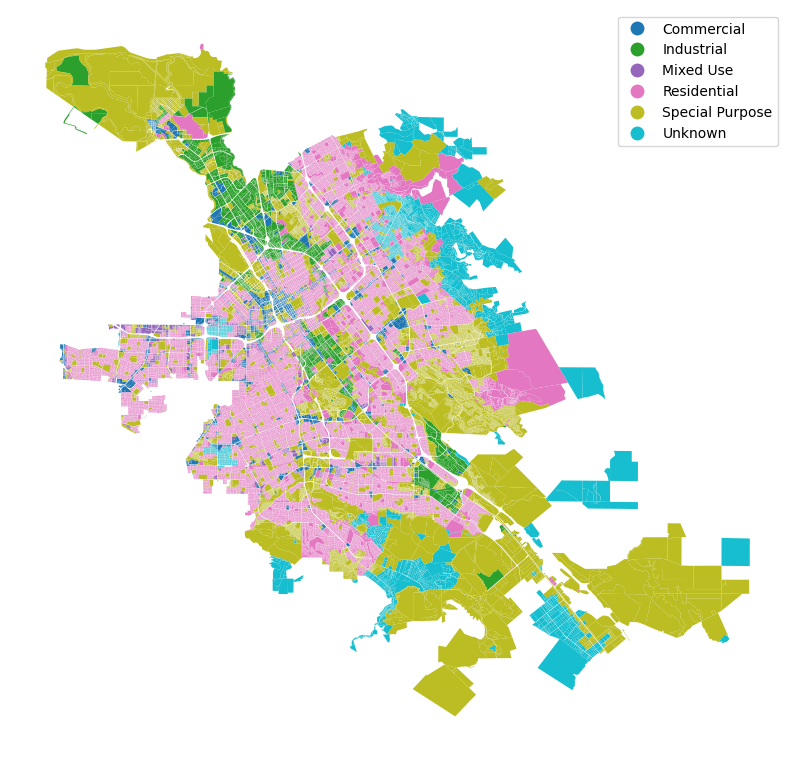

In [63]:
# All zoning in San Jose
# --------
fig, ax  = plt.subplots(figsize=(10,12))
ax.axis('off')
parcels.plot(ax = ax, column = 'zoning_class', legend = True)

<Axes: >

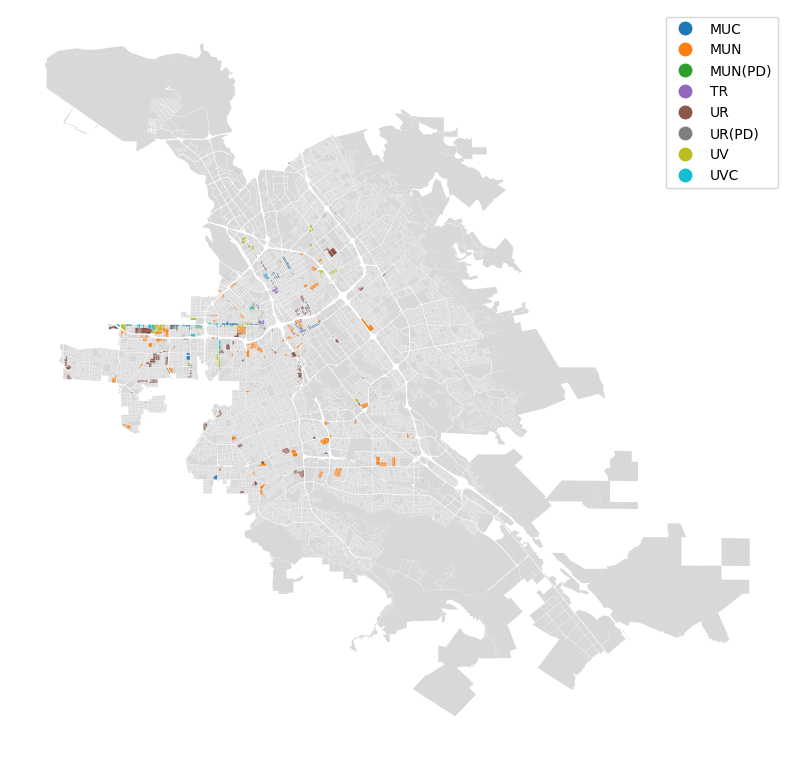

In [141]:
# mixed use zoning in San Jose
# --------
fig, ax  = plt.subplots(figsize=(10,12))
ax.axis('off')
parcels.plot(ax = ax, color = 'grey', alpha = 0.3, legend = True)
mixed_use.plot(ax = ax, column = 'ZONING', legend = True)

I then sum the total parcels by zone to determine how many parcels are in each zone and create a bar chart to make the results clearer.


<positron-console-cell-265>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



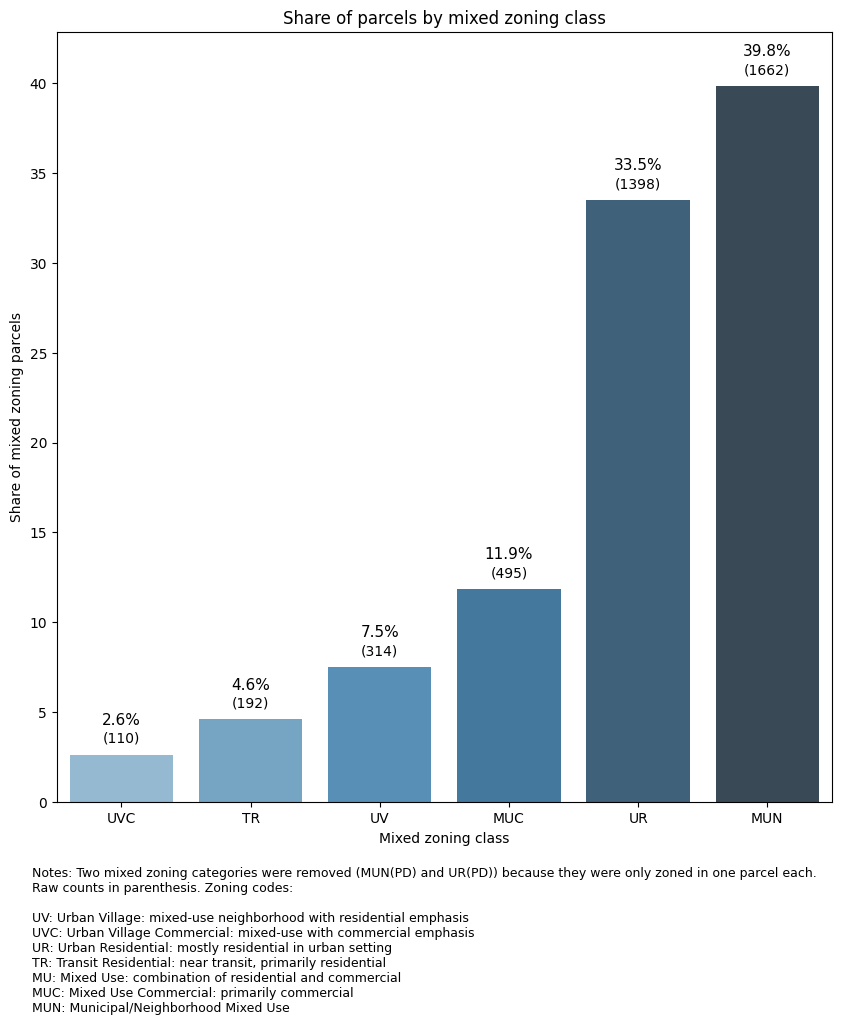

In [265]:
# Count unique parcels per zoning district in one step
count = (
    parcels[parcels["zoning_class"] == 'Mixed Use']
    .groupby("ZONING")["PARCELID"]
    .nunique()
)

# Reset index and rename column
count_df = count.reset_index().rename(columns={'PARCELID': 'unique_parcels'})

# Sort by count
count_df = count_df.sort_values(by='unique_parcels', ascending=True)

# Remove small count cases
count_df = count_df[~count_df["ZONING"].isin(["MUN(PD)", "UR(PD)"])]

# ---- NEW: compute shares ----
total = count_df["unique_parcels"].sum()
count_df["share"] = count_df["unique_parcels"] / total * 100

# Create barplot
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(data=count_df, x='ZONING', y='share', palette='Blues_d', ax=ax)

# extend the y-axis just a bit
max_val = count_df["share"].max()
ax.set_ylim(0, max_val + 3)  

# Add percent labels (slightly above bar)
for i, p in enumerate(ax.patches):
    bar_height = p.get_height()
    percent_val = count_df.iloc[i]["share"]   # percent from df
    
    ax.text(
        x=p.get_x() + p.get_width()/2,
        y=bar_height + 1.5,           # constant offset above bar
        s=f"{percent_val:.1f}%",
        ha='center',
        va='bottom',
        fontsize=11
    )

# Add count labels (a constant distance above percent)
for i, p in enumerate(ax.patches):
    bar_height = p.get_height()
    count_val = count_df.iloc[i]["unique_parcels"]  # count from df
    
    ax.text(
        x=p.get_x() + p.get_width()/2,
        y=bar_height + 0.5,           # slightly higher offset
        s=f"({count_val})",
        ha='center',
        va='bottom',
        fontsize=10
    )


# Labels and title
plt.xlabel('Mixed zoning class')
plt.ylabel('Share of mixed zoning parcels')
plt.title('Share of parcels by mixed zoning class')

# Note at bottom left
zoning_descriptions = {
    "UV": "Urban Village: mixed-use neighborhood with residential emphasis",
    "UVC": "Urban Village Commercial: mixed-use with commercial emphasis",
    "UR": "Urban Residential: mostly residential in urban setting",
    "TR": "Transit Residential: near transit, primarily residential",
    "MU": "Mixed Use: combination of residential and commercial",
    "MUC": "Mixed Use Commercial: primarily commercial",
    "MUN": "Municipal/Neighborhood Mixed Use",
    # Add other zoning codes as needed
}
combined_notes = (
    "Notes: Two mixed zoning categories were removed (MUN(PD) and UR(PD)) "
    "because they were only zoned in one parcel each. \nRaw counts in parenthesis. Zoning codes:\n\n"
     + "\n".join([f"{k}: {v}" for k, v in zoning_descriptions.items()])
)

fig.text(
    0.1, -0.1,          # x, y coordinates
    combined_notes,
    ha="left",
    fontsize=9
)

plt.savefig("../output/figures/mixed_zoning.pdf", format="pdf", bbox_inches="tight")
plt.show()


In [262]:

# -----------------------------
# Count only mixed-use parcels
# -----------------------------
table = (
    parcels
    .groupby("zoning_class")["PARCELID"]
    #.groupby("ZONING")
    .nunique()
    .reset_index()
    .rename(columns={"PARCELID": "count"})
)
table

#total_sum = table["count"].sum()
total_sum = table["count"].sum()
#table["total_count"]  = total_sum
table["total_count"]  = table["count"].sum()
table["share"] = (table["count"] / table["total_count"])*100
table




,zoning_class,count,total_count,share
0,Commercial,4996,224908,2.221353
1,Industrial,3836,224908,1.705586
2,Mixed Use,4173,224908,1.855425
3,Residential,159341,224908,70.847191
4,Special Purpose,44070,224908,19.594679
5,Unknown,8492,224908,3.775766


<positron-console-cell-267>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



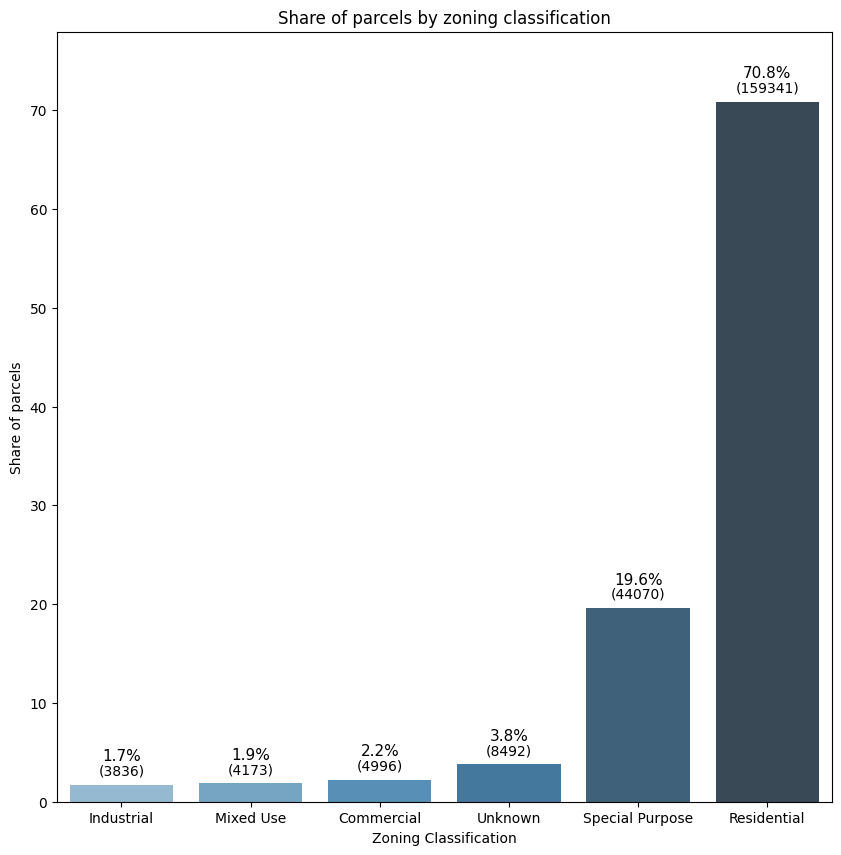

In [267]:
# Sort by count
table = table.sort_values(by='count', ascending=True)
max_bar_height = table["share"].max()

# Create barplot
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(data=table, 
            x='zoning_class', 
            y='share', 
            palette='Blues_d', 
            ax=ax)

# Extend y-axis to leave room for text
ax.set_ylim(0, max_bar_height * 1.1)

# Add percent and count labels
for i, p in enumerate(ax.patches):
    bar_height = p.get_height()
    percent_val = table.iloc[i]["share"]
    count_val = table.iloc[i]["count"]
    x = p.get_x() + p.get_width() / 2

    # Percent label
    ax.text(x=x, y=bar_height + max_bar_height*0.03,
            s=f"{percent_val:.1f}%", ha='center', va='bottom', fontsize=11)
    
    # Count label
    ax.text(x=x, y=bar_height + max_bar_height*0.01,
            s=f"({count_val})", ha='center', va='bottom', fontsize=10)

# Labels and title
plt.xlabel('Zoning Classification')
plt.ylabel('Share of parcels')
plt.title('Share of parcels by zoning classification')

plt.savefig("../output/figures/zoning.pdf", format="pdf", bbox_inches="tight")
plt.show()


## 2. Number of Urban Village parcels within 1 mile of San Jose Diridon Station

Now that we know how many of the four types of zoning there are in the city, how much of that zoning falls within 1 mile of the main station? This will give us a sense of the share of that zoning within near public transit hubs.


In [ ]:

# Define the zones you want to filter
urban_zoning = ["UV", "MUC", "UR", "TR"]

# 1. Ensure everything in projected CRS (meters) 
# Choose a local projection for San Jose (NAD83 / California zone 3 ft = EPSG:2227, or just Web Mercator EPSG:3857 for simplicity)
parcels = parcels.to_crs(epsg=3857)

# Diridon Station coordinates (lon, lat in WGS84)
diridon_station = gpd.GeoDataFrame(
    geometry=[Point(-121.9028, 37.3292)],
    crs="EPSG:4326"
).to_crs(parcels.crs)

# 2. Buffer the point 
buffer_1mile = diridon_station.buffer(1609.34)   # 1 mile
buffer_2mile = diridon_station.buffer(2 * 1609.34)  # 2 miles

# 3. Subset parcels to only within 2 miles 
parcels_within_2mile = gpd.overlay(parcels, gpd.GeoDataFrame(geometry=buffer_2mile, crs=parcels_in_zd.crs), how="intersection")

# 4. Identify UV parcels within 1 mile 
parcels_within_1mile = gpd.overlay(parcels, gpd.GeoDataFrame(geometry=buffer_1mile, crs=parcels_in_zd.crs), how="intersection")
uv_within_1mile = parcels_within_1mile[parcels_within_1mile["ZONING"].isin(urban_zoning)]





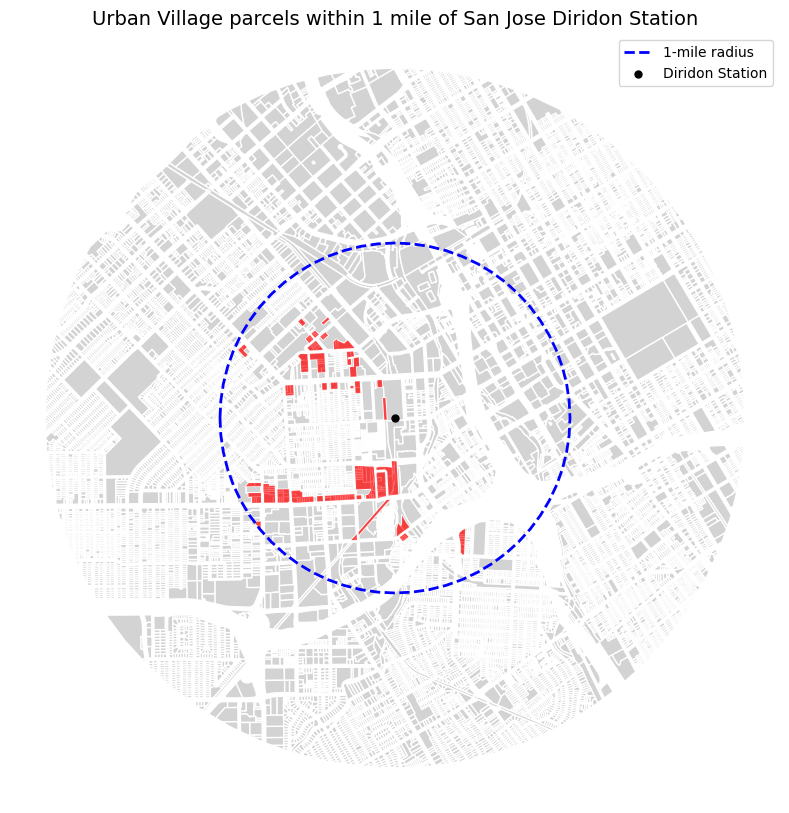

In [ ]:

# 5. Plot 
fig, ax = plt.subplots(figsize=(10,10))

# add parcel base map (zoomed into 2-mile area for viewing)
parcels_within_2mile.plot(ax=ax, color="lightgrey", edgecolor="white")

# highlight only UV parcels within 1 mile
uv_within_1mile.plot(ax=ax, color="red", alpha=0.7)

# add buffers
buffer_1mile.boundary.plot(ax=ax, color="blue", linestyle="--", linewidth=2, label="1-mile radius")

# add station marker
diridon_station.plot(ax=ax, color="black", marker=".", markersize=100, label="Diridon Station")

# format
ax.set_title("Urban-zoned parcels within 1 mile of San Jose Diridon Station", fontsize=14)
ax.legend()
ax.axis('off')

plt.show()

In [45]:
print(f"Total parcels within 1 mile: {len(parcels_within_1mile)}")
print(f"Total Urban-zoned parcels within 1 mile: {len(uv_within_1mile)}")
print(
    f"Share of Urban-zoned parcels within 1 mile: "
    f"{(len(uv_within_1mile) / len(parcels_within_1mile)) * 100:.2f}%")

Total parcels within 1 mile: 3248
Total Urban-zoned parcels within 1 mile: 165
Share of Urban-zoned parcels within 1 mile: 5.08%


## 3. San Jose equity analysis

In this part of the analysis, I want to identify where transit and housing is located in relation to where it is most needed in the city.

So, I'll add an equity score index data that comes directly from San Jose City calculations. These data can be obtained [here](https://data.sanjoseca.gov/dataset/equity-index-census-tracts), rely on ACS data, and serve as standard equity scores used by the city for planning purposes. I will be using the combined index scores for race and income, ranging from 2 (low priority) to 10 (high priority). 

In [46]:
#
# Add equity score
# ----------------------------------------

# specify geometry object of original tract data
geometry = sj_acs.geometry

# merge equity data into the GeoDataFrame
sj_acs_equity = sj_acs.merge(
    equity,
    left_on="GEOID_left",
    right_on="FIPSCODE",
    how="left"
)
# specify geometry since both shapefiles had geometry data and were renamed in the join
sj_acs_equity = gpd.GeoDataFrame(
    sj_acs_equity,
    geometry=geometry,
    crs=sj_acs.crs
)

# check
sj_acs_equity.head()



,STATEFP_left,COUNTYFP,TRACTCE,AFFGEOID_left,GEOID_left,NAME_left,NAMELSAD_left,STUSPS_left,NAMELSADCO,STATE_NAME_left,LSAD_left,ALAND_left,AWATER_left,centroid,index_right,STATEFP_right,PLACEFP,PLACENS,AFFGEOID_right,GEOID_right,NAME_right,NAMELSAD_right,STUSPS_right,STATE_NAME_right,LSAD_right,ALAND_right,AWATER_right,geometry_x,median_age,median_income,total_renter_households,rent_<15,rent_15_19,rent_20_24,rent_25_29,rent_30_34,rent_35_39,rent_40_49,rent_50_plus,poverty_universe,below_poverty,total_households,no_vehicle,tenure_total,owner_occupied,renter_occupied,total_workers,drove,public_transit_total,bus,subway,commuter_rail,light_rail,bike,walked,worked_home,GEOID_x,median_rent,units_total,units_1_detached,units_1_attached,units_2,units_3_4,units_5_9,units_10_19,units_20_49,units_50_plus,units_mobile,units_other,housing_units_total,housing_units_occupied,housing_units_vacant,race_total,white,black,asian,hisp_total,hispanic,edu_total,bachelors,masters,professional,doctorate,gini,rent_burdened_count,rent_burdened_pct,poverty_rate,pct_renters,pct_homeowners,no_vehicle_pct,public_transit_pct,drove_pct,bike_pct,walked_pct,commuter_rail_pct,light_rail_pct,worked_home_pct,single_family_units,small_multifamily_units,medium_multifamily_units,large_multifamily_units,other_units,pct_single_family,pct_small_multifamily,pct_medium_multifamily,pct_large_multifamily,pct_other,vacancy_rate,pct_white,pct_black,pct_asian,pct_latino,college_plus,pct_college_plus,OBJECTID,FACILITYID,FIPSCODE,GEOID_y,CENSUSTRAC,GEOGRAPHIC,POPTOTAL,HOUSEHOLDC,RACEHISPAN,RACEHISP_1,RACEWHITEN,RACEWHITER,RACEBLACKN,RACEBLACKR,RACEASIANN,RACEASIANR,RACEOTHER,RACEOTHERR,RACEBIPOC,RACEBIPOCR,EQUITYSCOR,INCMEDIANI,EQUITYSC_1,INCMEDIANH,INCMEDIANW,INCMEDIANB,INCMEDIANA,INCMEDIANO,EQUITYSC_2,LANGGROUPP,LEPTOTAL,LEPRATIO,LEPSPANISH,LEPSPANI_1,LEPINDOEUR,LEPINDOE_1,LEPASIANPA,LEPASIAN_1,LEPOTHER,LEPOTHERRA,EQUITYSC_3,EDUGROUPPO,EDULESSTHA,EDULESST_1,EQUITYSC_4,LASTUPDATE,LASTUPDA_1,ENTERPRISE,INSANJOSE,Shape_Leng,Shape_Area,geometry_y,geometry
0,06,085,500100,1400000US06085500100,06085500100,5001,Census Tract 5001,CA,Santa Clara County,California,CT,1922120,0,POINT (-121.89279 37.35849),85,06,68000,02411790,1600000US0668000,0668000,San Jose,San Jose city,CA,California,25,460811249,8089813,"POLYGON ((-121.90278 37.36256, -121.90178 37.3...",34.2,154868.0,1779,0,389,171,266,185,79,77,137,7850,698,2872,88,2872,1093,1779,4838,3782,174,100,0,30,44,76,123,623,06085500100,2817.0,3076,1084,412,199,43,69,63,216,990,0,0,3076,2872,204,7903,2059,584,1851,7903,3941,5532,1519,769,237,226,0.4183,478,26.869028,8.891720,61.942897,38.057103,3.064067,3.596527,78.172799,1.570897,2.542373,0.620091,0.909467,12.877222,1496,242,132,1206,0,48.634590,7.867360,4.291287,39.206762,0.000000,6.631990,26.053397,7.389599,23.421486,49.867139,2751,49.728850,149,1,06085500100,1400000US06085500100,5001.00,"Census Tract 5001, Santa Clara County, California",7903,2872,3941,0.499,1200,0.152,527,0.067,1787,0.226,448,0.057,6703,0.848,4,154868,2,99519.0,195357.0,236029.0,174620.0,255000.0,6,7321,2026,0.277,1607,0.793,22,0.011,397,0.196,0,0.000,4,5532,994,0.180,4,ACSDT5Y2022,2024-04-23,REF-CDTR-0000000001,Yes,19857.630622,2.068743e+07,"POLYGON ((6153451.276 1956897.303, 6153492.1 1...","POLYGON ((-121.90278 37.36256, -121.90178 37.3..."
1,06,085,503210,1400000US06085503210,06085503210,5032.10,Census Tract 5032.10,CA,Santa Clara County,California,CT,1595929,0,POINT (-121.82275 37.29039),85,06,68000,02411790,1600000US0668000,0668000,San Jose,San Jose city,CA,California,25,460811249,8089813,"POLYGON ((-121.83321 37.29342, -121.82894 37.2...",38.4,113113.0,336,0,32,17,75,18,43,11,42,4419,118,990,78,990,654,336,2251,2079,30,20,10,0,0,10,0,104,06085503210,2522.0,1033,824,205,4,0,0,0,0,0,0,0,1033,990,43,4435,949,174,1862,4435,2092,3020,442,119,24,4,0.3892,114,33.928571,2.670287,33.939394,66.060606,7.878788,1.332741,92.358952,0.444247,0.000000,0.000000,0.000000,4.620169,1029,4,0,0,0,99.612778,0.387222,0.000000,0.000000

##### Mapping equity

Using a natural breaks classification scheme with 4 groups, we can see a clear clustering of high equity scores (higher priority neighborhoods) just 2 miles southeast of the station. While much of the highest values (6-10) cluster outside of the 2 mile radius from the station, there are still some tracts with high equity scores within the radius.

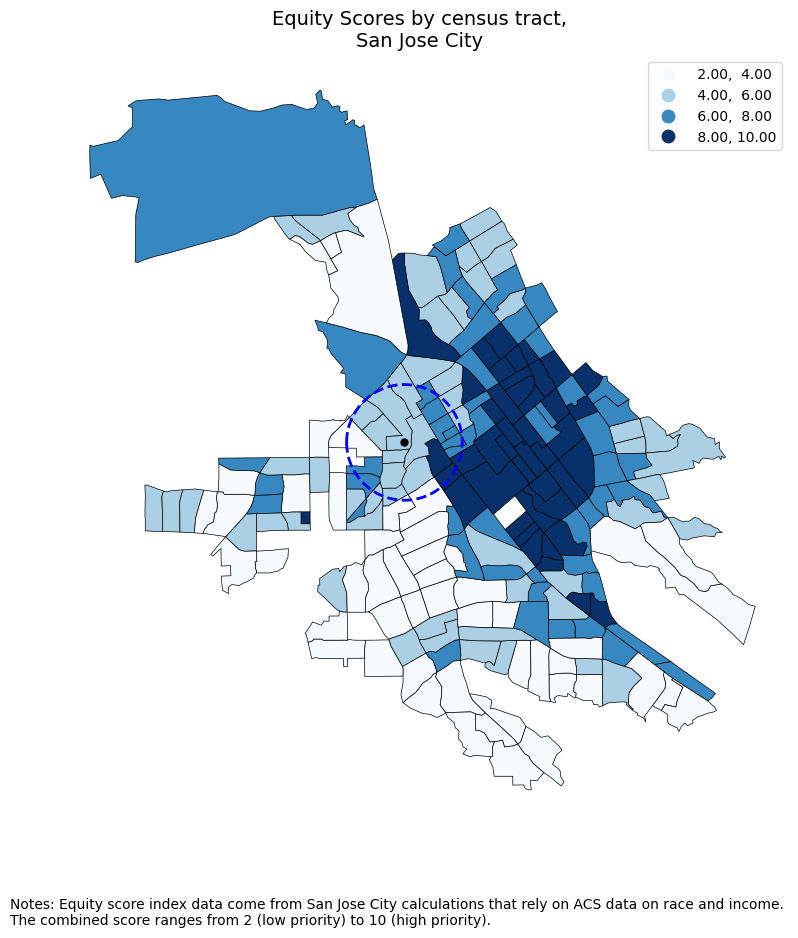

In [49]:
# import custom mapping function
from functions import choropleth_map

# 
# Equity score map
# ----------------------------------------
choropleth_map(
    gdf=sj_acs_equity,
    column="EQUITYSC_2", 
    title="Equity Scores by census tract, \nSan Jose City ",
    station_gdf=diridon_station,
    buffer_gdf=buffer_2mile,
    k = 4,
    notes="Notes: Equity score index data come from San Jose City calculations that rely on ACS data on race and income. \nThe combined score ranges from 2 (low priority) to 10 (high priority).",
    save=False,
    filename="../output/maps/equity_score.pdf"
)


##### Mapping median income

The results from this figure are not surprising, since the equity score on the previous figure are based in part by median income. Nevertheless, the clear cluster of lower median incomes (below $87,000) is quite stark and maps on very neatly to the equity findings from the previous figure. 

Figure saved as ../output/maps/median_income.pdf


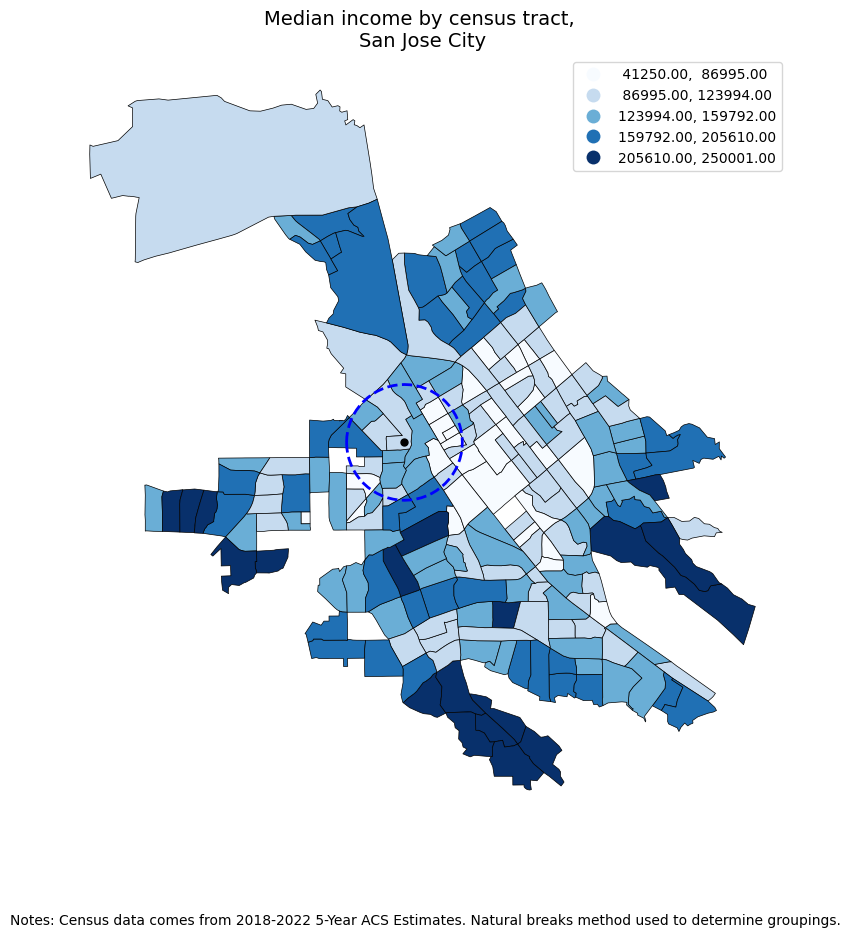

In [ ]:
# 
# Median income
# ----------------------------------------
choropleth_map(
    gdf=sj_acs_equity,
    column="median_income",
    title="Median income by census tract, \nSan Jose City",
    station_gdf=diridon_station,
    buffer_gdf=buffer_2mile,
    k = 5,
    notes="Notes: Census data comes from 2018-2022 5-Year ACS Estimates. Natural breaks method used to determine groupings.",
    save=True,
    filename="../output/maps/median_income.pdf"
)


##### Mapping race 

This figure is again not surprising since it is also one of the components of the equity index, but the clear cluster reinforces previous findings:  strong racial segregation, with very low relative rates of white residents on the east side of the city. 

Figure saved as ../output/maps/percent_white.pdf


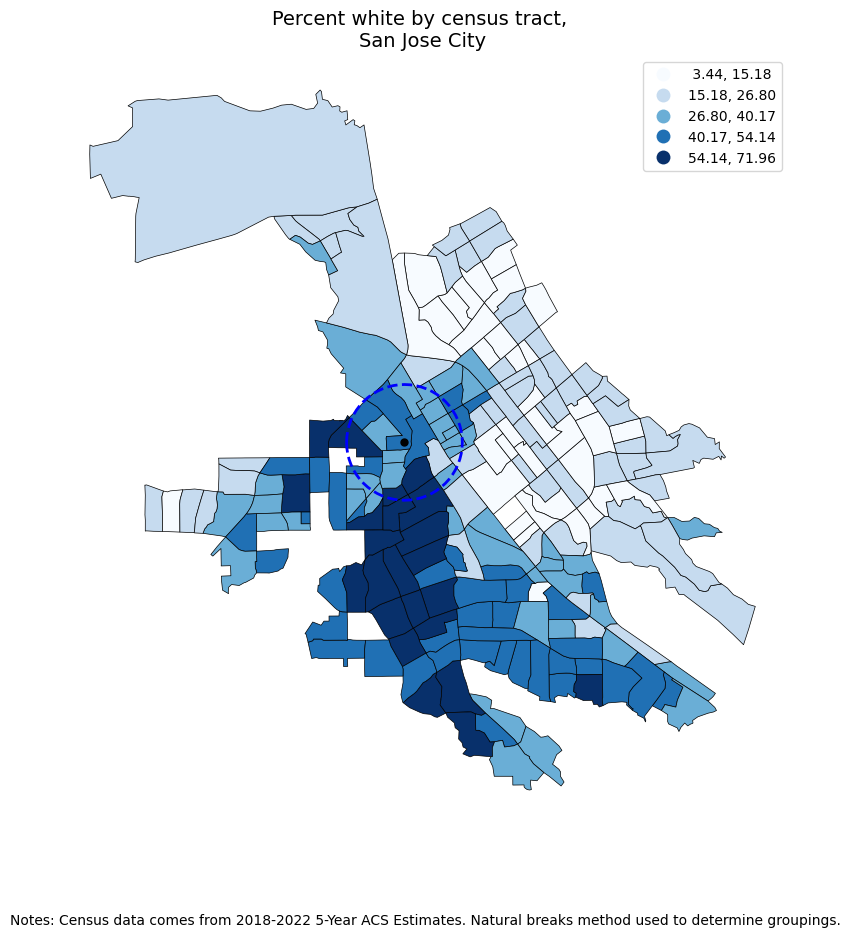

In [ ]:
# 
# Race: percent white
# ----------------------------------------
choropleth_map(
    gdf=sj_acs_equity,
    column="pct_white", 
    title="Percent white by census tract, \nSan Jose City",
    station_gdf=diridon_station,
    buffer_gdf=buffer_2mile,
    k = 5,
    notes="Notes: Census data comes from 2018-2022 5-Year ACS Estimates. Natural breaks method used to determine groupings.",
    save=True,
    filename="../output/maps/percent_white.pdf"
)


##### Mapping vacancy 

This map shows that some of the city's highest vacancy rates are in the city center. This may be in part because of the lack of residential zoning in this area (this warrants further examination to make sure the census demographic finding of high vacancy rates is not an artifact of zoning). Nevertheless, beyond upzoning for more units, there is an opportunity to fill more of the current units available downtown within 2 miles of Diridon Station. 

Figure saved as ../output/maps/vacancy_rate.pdf


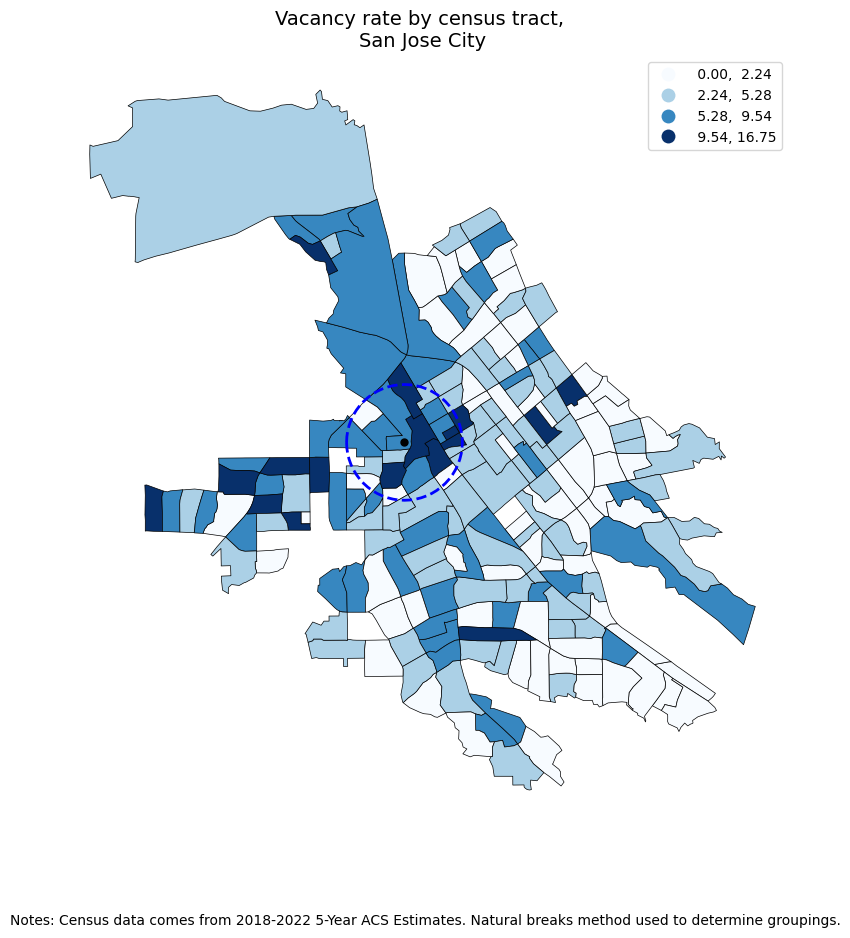

In [ ]:
# 
# Vacancy rate
# ----------------------------------------
choropleth_map(
    gdf=sj_acs_equity,
    column="vacancy_rate", 
    title="Vacancy rate by census tract, \nSan Jose City",
    station_gdf=diridon_station,
    buffer_gdf=buffer_2mile,
    k = 4,
    notes="Notes: Census data comes from 2018-2022 5-Year ACS Estimates. Natural breaks method used to determine groupings.",
    save=True,
    filename="../output/maps/vacancy_rate.pdf"
)

##### Mapping renters 

This map clearly shows that many of the city's renters live near Diridon Station. Nearly every census tract within 2 miles of the station has a share of renters between 60 and 80 percent. This highights an opportunity for more affordable and rental housing within 2 miles of Diridon Station. 

Figure saved as ../output/maps/renters.pdf


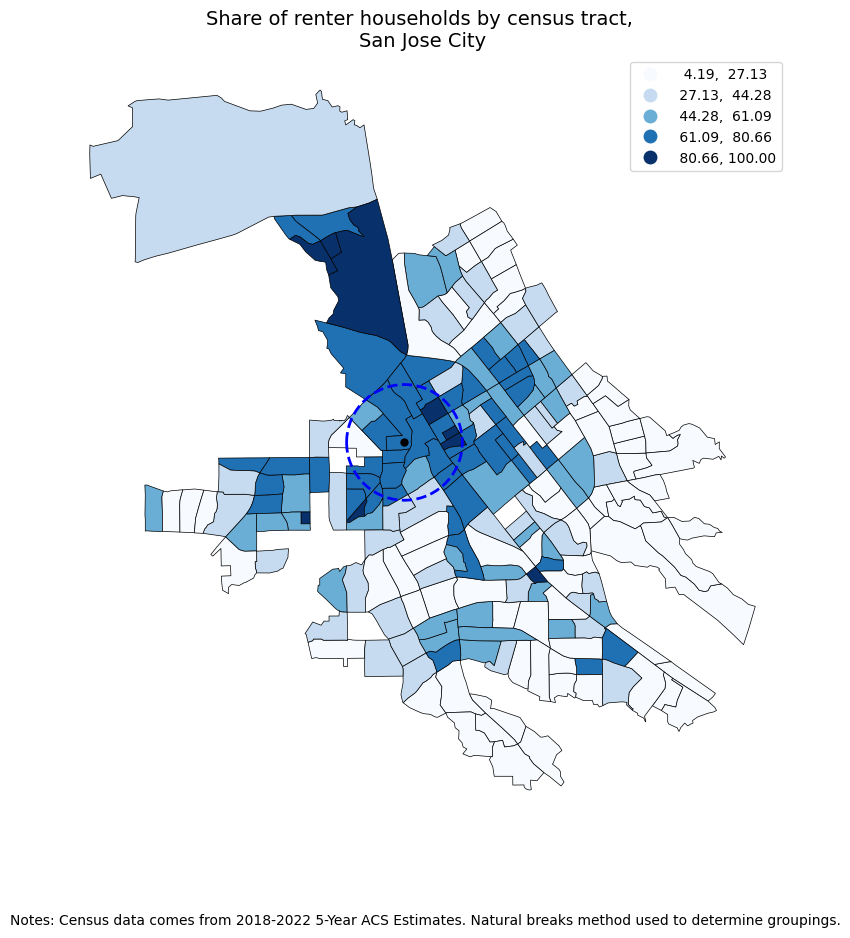

In [ ]:
# 
# Renters
# ----------------------------------------
choropleth_map(
    gdf=sj_acs_equity,
    column="pct_renters", 
    title="Share of renter households by census tract, \nSan Jose City",
    station_gdf=diridon_station,
    buffer_gdf=buffer_2mile,
    k = 5,
    notes="Notes: Census data comes from 2018-2022 5-Year ACS Estimates. Natural breaks method used to determine groupings.",
    save=True,
    filename="../output/maps/renters.pdf"
)

##### Mapping public transit dependency 

This map clearly shows that some of the highest rates of households dependent on public transit live within 2 miles of Diridon Station. This is not that surprising, but there are many tracts just outside of that 2 mile radius to the east that also have higher rates of dependency on public transit. Many of these tracts are the same with high equity scores.

Figure saved as ../output/maps/public_transit.pdf


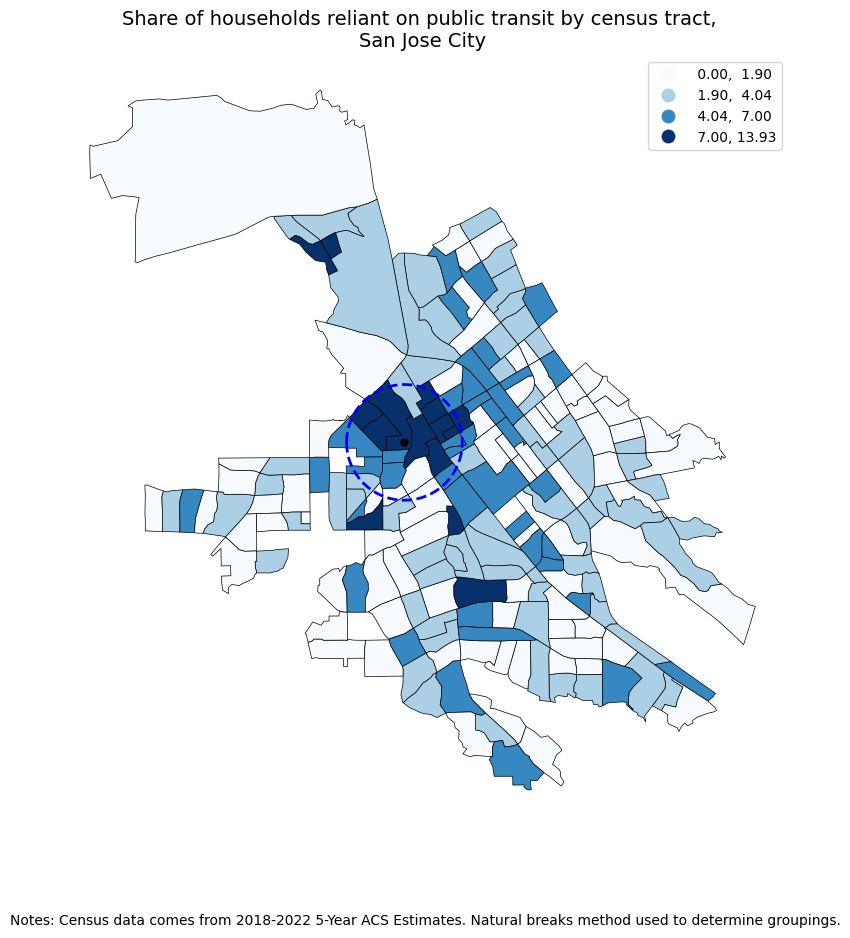

In [51]:
# 
# public transit
# ----------------------------------------
choropleth_map(
    gdf=sj_acs_equity,
    column="public_transit_pct", 
    title="Share of households reliant on public transit by census tract, \nSan Jose City",
    station_gdf=diridon_station,
    buffer_gdf=buffer_2mile,
    k = 4,
    notes="Notes: Census data comes from 2018-2022 5-Year ACS Estimates. Natural breaks method used to determine groupings.",
    save=True,
    filename="../output/maps/public_transit.pdf"
)


##### Figure to present to a city official


Reading through the [Zoning Handbook](https://library.municode.com/ca/san_jose/codes/code_of_ordinances?nodeId=TIT20ZO_CH20.55URVIMIUSZODI), I came across *"Chapter 20.55 - URBAN VILLAGE AND MIXED USE ZONING DISTRICTS"* that describes Urban Villages as a major strategy for growth. It suggests that this type of zoning can be a growth strategy to achieve "active, dense, mixed use growth areas and for identifying locations for public open spaces within the city." What was somewhat surprising here is how little of the city is zoned for Urban Villages, particularly the 2-mile zone near the Diridon Station and the in the high equity area just east of the station. I would assume these areas would be priorities for development, growth, and economic opportunity, yet they are not sufficiently zoned for that. 

I think the City's stated growth and development goals are somewhat misaligned with the City's need. To better align with the City's own stated equity goals, more Urban Village zoning should be located near Diridon station and in the lower-income and non-White neighborhoods just to the east. 

There are two shortcomings with this map that I'd like to acknowledge. First, I am aware of the Urban Village Commercial zoning and would like to dig further into that category to better understand the extent to which it is (1) part of the "Urban Village as growth strategy discourse", (2) how much residential housing it would produce (Urban Village is 100% Residential du/ac of 55-250, but I can't find anything on UVC), and (3) whether incorporating UVC into the map would dramatically change the map findings (I don't think so). The second shortcoming is technical. I'm having a bit of trouble with the map legends. The legend for the zoning layer is not properly displayed and I'm not able to add legend titles. I was able to save the first legend and then manually add it using `ax.add_artist(leg1)`, but the legends are not where I would like them for a presentation to city official. I'd also like to add legend titles, but that also seems a bit complicated with the multiple legends.


<positron-console-cell-68>:34: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler


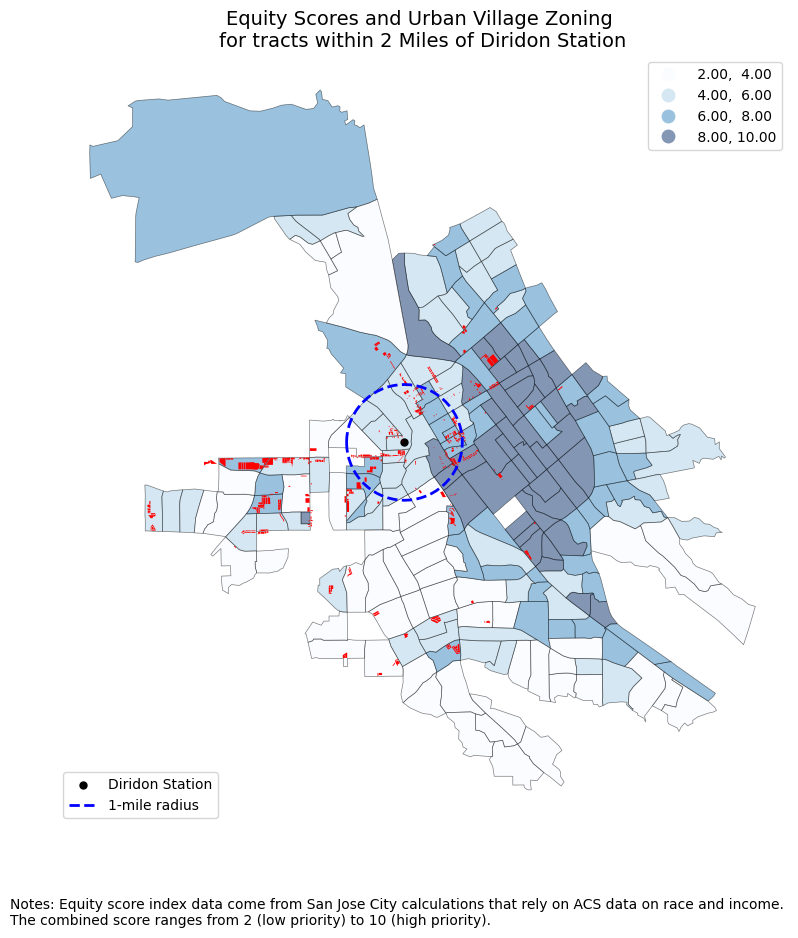

In [ ]:
# 
# Final equity score map
# ----------------------------------------

# ensure consistent CRS
diridon_station = diridon_station.to_crs(epsg=4269) 
buffer_2mile = buffer_2mile.to_crs(epsg=4269) 
zoning_uv = zoning_uv.to_crs(epsg=4269) 
mixed_use = mixed_use.to_crs(epsg=4269) 

fig, ax = plt.subplots(figsize=(10, 10))
ax.axis("off")

# choropleth
sj_acs_equity.plot(
    ax=ax,
    column="EQUITYSC_2",
    scheme="NaturalBreaks",
    k = 4, 
    legend=True,
    alpha = 0.5,
    cmap="Blues",        # Monotonic blue color scale
    edgecolor="black",   
    linewidth=0.5
)
# save legend from first plot 
leg1 = ax.get_legend() 

# add additional overlays
diridon_station.plot(ax=ax, color="black", marker=".", markersize=100, label="Diridon Station")
buffer_2mile.boundary.plot(ax=ax, color="blue", linestyle="--", linewidth=2, label="1-mile radius")
#zoning_uv.plot(ax=ax, color="red", alpha=1, legend = True, label="Zoning UV")
mixed_use.plot(ax=ax, color="red", alpha=1, legend = True, label="Urban Zoning")
ax.legend(loc="lower left")
ax.add_artist(leg1) # add the first legend back in

# add title
ax.set_title("Equity Scores and Urban Village Zoning \nfor tracts within 2 Miles of Diridon Station", fontsize=14)
# add note at bottom left
fig.text(
    0.1, 0.01,                    
    "Notes: Equity score index data come from San Jose City calculations that rely on ACS data on race and income. \nThe combined score ranges from 2 (low priority) to 10 (high priority).", 
    ha="left", fontsize=10)
plt.savefig("../output/maps/final_equity_map.pdf", format="pdf", bbox_inches="tight")  
plt.show()